> # **Canciones y artistas más populares en Spotify hasta el año 2021**

![pasted-image-0-4-1024x576](https://www.liderlogo.es/wp-content/uploads/2022/12/pasted-image-0-4-1024x576.png)

----------------------------------------------


Spotify es un proveedor sueco de servicios de transmisión de audio y medios fundado en abril de 2006. Es el proveedor de servicios de transmisión de música más grande del mundo y tiene más de 381 millones de usuarios activos mensuales, que también incluye aproximadamente 172 millones de suscriptores pagos. La plataforma ha cambiado la forma en que escuchamos y descubrimos música, y con más de 356 millones de usuarios activos mensuales en 2021, la plataforma tiene un gran conjunto de datos sobre cómo se escucha música en todo el mundo. En este análisis, utilizaremos los datos de Spotify para analizar la evolución de la música popular a lo largo de los años, explorando y cuantificanado los datos sobre música; con el fin de extraer la información valiosa.

Los datos comprenden un rango de fechas desde 1900-01-01 hasta 2021-04-16, pero con la ayuda de las APIs extraeremos más información para complementar la base de datos.

__Descripción de las variables:__

- __id:__ Identificador único de cada registro

- __name:__ Nombre de la canción

- __popularity:__ Popularidad

- **duration_ms:** Duracion en microsegundos

- **explicit:** indica si la canción contiene lenguaje explícito (0 = no, 1 = sí)

- **artists:** Artista/artistas

- **id_artists:** Identificador de los artistas

- **release_date:** fecha de lanzamiento

- **danceability:** Spotify define esta cualidad, que podría ser traducida como bailiabilidad, midiendo cuánto de apta para bailar es la canción, basándose en una combinación de elementos musicales que incluye el tempo, la estabilidad rítmica, la intensidad del pulso y la regularidad general (de 0 a 1).

- **key:** tonalidad de la canción (0 = Do, 1 = Do#, 2 = Re, etc.)

- **loudness:** nivel de sonoridad de la canción en decibelios (dB)

- **mode:** indica si la canción está en modo mayor (1) o menor (0)

- **speechiness:** Por speechiness se entiende la presencia de palabras habladas en el tema. Para pistas totalmente habladas, como un audiolibro, un recital de un poema, etc., el valor de este parámetro se acercará a 1.0.

- **instrumentalness:** Este parámetro da información sobre la presencia de elementos vocales en la canción. Cuanto más próximo esté este valor a 1.0, mayor probabilidad de que el tema no tenga voces.

- **acousticness:** medida de la presencia de elementos acústicos en la canción (de 0 a 1)

- **tempo:** Velocidad con que se interpreta una composición musical.

- **valence:** es una medida de la positividad o negatividad de una canción. Se define como la medida de la "valencia musical" de una pista, que oscila entre 0 y 1, donde 0 es la pista más triste y 1 es la pista más feliz o alegre.

#### **Objetivo**

Anticipar los patrones de comportamiento de los usuarios y para ayudar a mejorar el servicio.


#### **Contexto Comercial**

Este análisis busca brindar una visión a posibles problemas y mejoras del servicio, y así poder ayudar a los artistas a saber que tipo de música es más popular y por ende que esta sea más rentable. también se busca comparar características en las canciones con el fin de comprender que es lo que atrae a los usuarios y saber cuanto ha cambiado la producción musical en a lo largo de los años.


#### **Problema Comercial**

Algunos problemas comerciales que podrían surgir, están relacionados a música con baja escuchabilidad en la plataforma lo que puede conllevar a perdidas para el artista.


#### **Contexto Analítico**

Inicialmente se realiza un cuestionamiento a partir del objetivo, los problemas y el contexto comercial, dando lugar a las siguientes preguntas:

¿Cuánto ha cambiado la producción de música a lo largo de los años?

¿Cuáles son las canciones y artistas más populares?

Analizar las características de las canciones que son más o menos populares para comprender mejor lo que atrae a los usuarios, como el tempo, la energía, la instrumentalización, etc.



-----------------------------------------------------

Tabla de contenido:

1. Storytelling
3. Tabla de contenidos
4. Base de datos y librerias
5. APIs
6. Data Wrangling - Exploración y limpieza de los datos
7. Análisis Exploratorio de Datos
8. Evolución de la música hasta el 2021
9. Canciones y artistas más populares
0. Conclusiones


> ### Base de datosy librerias

Datos extraidos de Kaggle: https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv

BD: tracks.csv

Para ver librerias y modificaciones sobre la BD, precionar "Click here to toggle on/off the raw code" al final del notebook.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from datetime import timedelta, datetime
import statsmodels.api as sm

#Carga de archivos
os.getcwd()
os.chdir('C:\\Users\\jocelyne.paradas\\Desktop\\Joce\\DataScience\\Data\\archive')
df = pd.read_csv('tracks.csv', encoding='latin-1')
df_artists = pd.read_csv('artists.csv', encoding='latin-1')
os.chdir('C:\\Users\\jocelyne.paradas\\Desktop\\Joce\\DataScience\\Data\\archive1')
df2 = pd.read_csv('SpotifyFeatures.csv', encoding='latin-1')

#Modificación de los datos
df = df.dropna(axis=0)
df["release_date"]= pd.to_datetime(df["release_date"])
#se elimina atributo ya que es una composicion entre el tempo y el compás y no suma a los datos
df = df.drop(['time_signature'],axis=1) 

#Columnas agrgadas
df['year'] = df['release_date'].dt.year


> ### APIs

In [2]:
!pip install spotipy

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'abe8c35f233948f78e482a09e0c61a47'
client_secret = '377d83b270d44831b5fbdfe7e9718a27'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

top_artists = sp.search(q='year:2021', type='artist', limit=50)

data = {'id': [], 'name': [], 'popularity': [], 'genres': [], 'followers': []}

for artist in top_artists['artists']['items']:
    data['id'].append(artist['id'])
    data['name'].append(artist['name'])
    data['popularity'].append(artist['popularity'])
    data['genres'].append(artist['genres'])
    data['followers'].append(artist['followers'])


api1 = pd.DataFrame(data).sort_values('popularity', ascending=False)


In [4]:
print("API")
display(api1)
display(api1.info())

API


,id,name,popularity,genres,followers
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,[pop],"{'href': None, 'total': 75379085}"
3,4q3ewBCX7sLwd24euuV69X,Bad Bunny,97,"[reggaeton, trap latino, urbano latino]","{'href': None, 'total': 69665117}"
1,3TVXtAsR1Inumwj472S9r4,Drake,95,"[canadian hip hop, canadian pop, hip hop, rap,...","{'href': None, 'total': 75592260}"
2,4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,91,[contemporary country],"{'href': None, 'total': 5983297}"
22,7dGJo4pcD2V6oG8kP0tJRR,Eminem,91,"[detroit hip hop, hip hop, rap]","{'href': None, 'total': 71236127}"
30,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,91,"[pop, uk pop]","{'href': None, 'total': 112328891}"
4,1URnnhqYAYcrqrcwql10ft,21 Savage,90,"[atl hip hop, hip hop, rap, trap]","{'href': None, 'total': 13766190}"
5,1RyvyyTE3xzB2ZywiAwp0i,Future,90,"[atl hip hop, hip hop, rap, southern hip hop, ...","{'href': None, 'total': 13959484}"
6,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,90,"[chicago rap, hip hop, rap]","{'href': None, 'total': 20172633}"
8,7tYKF4w9nC0nq9CsPZTHyP,SZA,90,"[pop, r&b, rap]","{'href': None, 'total': 12737796}"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          50 non-null     object
 1   name        50 non-null     object
 2   popularity  50 non-null     int64 
 3   genres      50 non-null     object
 4   followers   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


None

> ### Data Wrangling y Análisis Exploratorio de Datos (EDA) 

In [5]:
print(f'Fechas: \nMínima {df.release_date.min()} y \nMáxima {df.release_date.max()}')

Fechas: 
Mínima 1900-01-01 00:00:00 y 
Máxima 2021-04-16 00:00:00


In [6]:
print("El dataset (df) no contiene valores nulos ni duplicados")
df = df.drop_duplicates()
df.isna().sum()

El dataset (df) no contiene valores nulos ni duplicados


id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
year                0
dtype: int64

Eliminamos outliers inferiores, basándonos en la polpularidad de la canciones. Por otro lado se mantienen los límites superiores ya que nos indican las canciones que realmente son o fueron populares.


In [7]:
mean = df["popularity"].mean()
std = df["popularity"].std()
inferior = mean - (3 * std)

df = df[(df["popularity"] > inferior)]
print("DF")
display(df)

print("Información general del DF\n")

display(df.info())

DF


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,1922
1,021ht4sdgPcrDgSk7JTbKY,CapÃ­tulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,äºä¸æµ·,50,258267,0,['é¿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021


Información general del DF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586601 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586601 non-null  int64         
 3   duration_ms       586601 non-null  int64         
 4   explicit          586601 non-null  int64         
 5   artists           586601 non-null  object        
 6   id_artists        586601 non-null  object        
 7   release_date      586601 non-null  datetime64[ns]
 8   danceability      586601 non-null  float64       
 9   energy            586601 non-null  float64       
 10  key               586601 non-null  int64         
 11  loudness          586601 non-null  float64       
 12  mode              586601 non-null  int64         
 13  speechiness       586601 non-nu

None

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586601.0,230054.852626,126532.824981,3344.0,175083.0000,214907.000000,263867.00000,5621218.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586601.0,5.221594,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586601.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996


> #### Evolución de la música hasta el 2021

Gráfico general en base a la popularidad


<AxesSubplot:xlabel='popularity'>

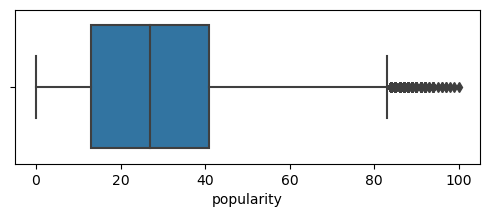

In [9]:
print("Gráfico general en base a la popularidad")

plt.figure(figsize=(6,2))
sns.boxplot(x=df["popularity"])

<Figure size 1000x500 with 0 Axes>

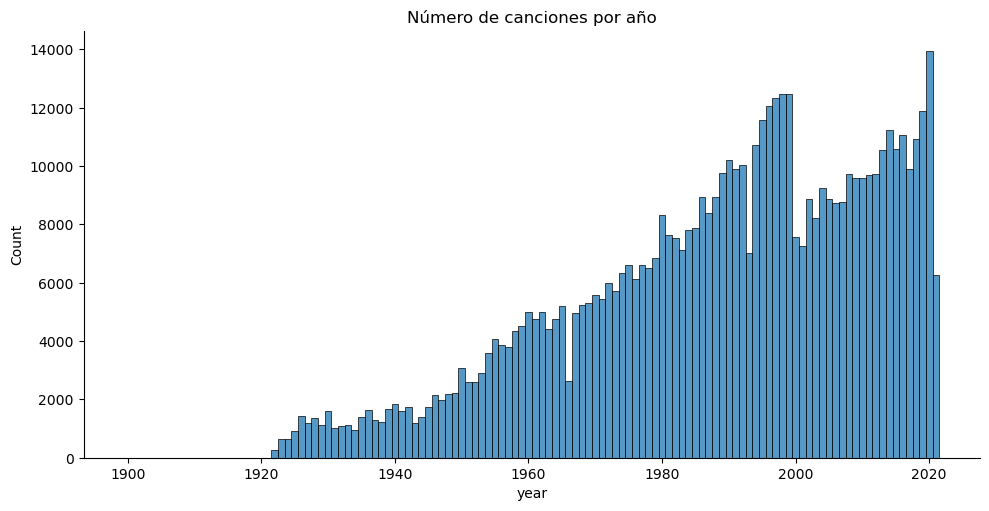

In [10]:
plt.figure(figsize=(10,5))
sns.displot(df['year'], discrete=True, aspect=2, height=5, kind="hist").set(title="Número de canciones por año")

Podemos ver un notable crecimiento en la cantidad de canciones desde 1900.

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

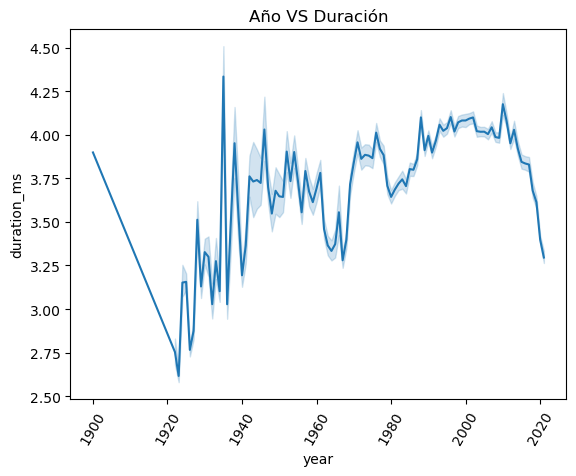

In [11]:
minutos = df.duration_ms/60000
fig_dims = (10,5)
fig = sns.lineplot(x = df.year, y = minutos).set(title = "Año VS Duración")
plt.xticks(rotation = 60)

En este gráfico a nivel general, podemos ver la variación de la duración de las canciones en minutos, desde los años de 1900, si bien podemos ver picos importantes, la tendencia es creciente y decae en el 2020 por la falta de datos.

Correlación entre las variables


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'explicit'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'key'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'mode'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'acousticness'),
 Text(10.5, 0, 'instrumentalness'),
 Text(11.5, 0, 'liveness'),
 Text(12.5, 0, 'valence'),
 Text(13.5, 0, 'tempo')]

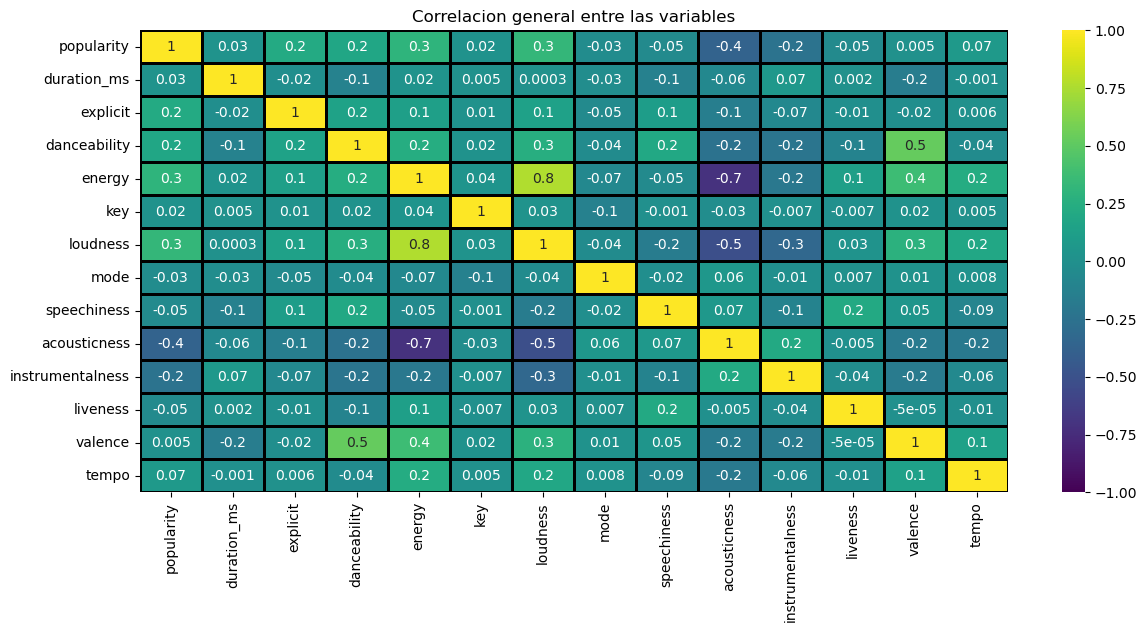

In [12]:
print("Correlación entre las variables")

corr_df = df.drop(['year'],axis=1).corr(method="pearson")
plt.figure(figsize= (14,6))
heatmap= sns.heatmap(corr_df,annot= True,fmt= ".1g", vmin=-1,vmax=1, center=0,cmap="viridis",linewidths=1,linecolor='black')
heatmap.set_title("Correlacion general entre las variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

Podemos ver una mayor correlación entre las variables:

- Energy y loudness (siendo esta la más significativa)
- Danceability y valence
- Energy y valence

[Text(0.5, 1.0, 'Correlación entre Loudness vs Energy')]

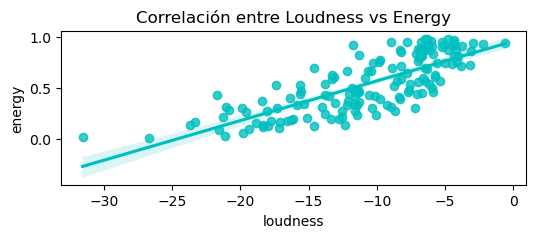

In [13]:
plt.figure(figsize=(6,2))
sns.regplot(data=df.sample(n=150, random_state=42), x="loudness", y="energy", color="c").set(title="Correlación entre Loudness vs Energy")

Se toma una muestra aleatoria de la base de datos principal, en este caso podemos ver que mientras más energía tiene la canción más ruidosa es esta, es decir, los niveles de sonoridad son más altos.

[Text(0.5, 1.0, 'Correlación entre danceability vs valence')]

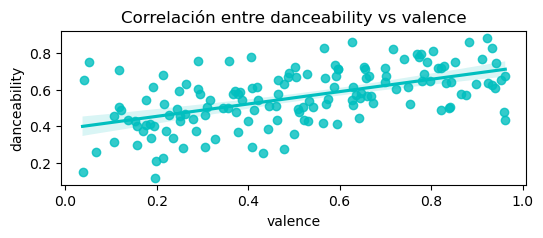

In [14]:
plt.figure(figsize=(6,2))
sns.regplot(data=df.sample(n=150, random_state=42), x="valence", y="danceability", color="c").set(title="Correlación entre danceability vs valence")

En este gráfico podemos ver una tendecia a subir el atributo "danceability" cuando el atributo "valence" aumenta, lo que quiere decir que mientras mas positiva o alegre sea la canción esta suele ser más bailable.

[Text(0.5, 1.0, 'Correlación entre Energy vs Valence')]

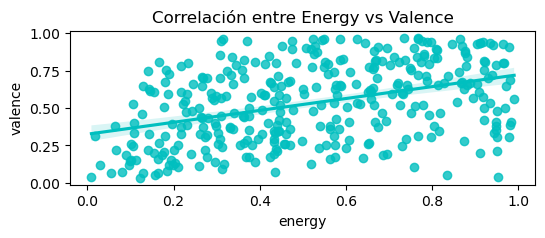

In [15]:
plt.figure(figsize=(6,2))
sns.regplot(data=df.sample(n=350, random_state=42), y="valence", x="energy", color="c").set(title="Correlación entre Energy vs Valence")

En en este caso podemos ver que aunque los puntos esten dispersos, a nivel general hay una ligera relción entre "valence" que es el nivel de positividad o negatividad, siendo 1 el tope de positividad, y la energía de la canción. Lo que nos indica que no necesariamente las canciones energicas transmiten positividad 

> #### **Canciones y artistas más populares**

In [16]:
print("Top 10 artistas 2021")
artist10 = api1.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False).iloc[:10]
display(artist10[['name', 'popularity', 'genres']])

Top 10 artistas 2021


,name,popularity,genres
0,Taylor Swift,100,[pop]
3,Bad Bunny,97,"[reggaeton, trap latino, urbano latino]"
1,Drake,95,"[canadian hip hop, canadian pop, hip hop, rap,..."
2,Morgan Wallen,91,[contemporary country]
22,Eminem,91,"[detroit hip hop, hip hop, rap]"
30,Ed Sheeran,91,"[pop, uk pop]"


In [17]:
api1['followers_total'] = api1['followers'].apply(lambda x: x['total'])

artistas_followers = api1[['name', 'followers_total']].sort_values('followers_total', ascending=False)
artista1 = artistas_followers.iloc[0]['name']
followers = artistas_followers.iloc[0]["followers_total"]

print("El artista con más followers segun la api en el año 2021 es,",artista1, "con",followers) 

El artista con más followers segun la api en el año 2021 es, Ed Sheeran con 112328891


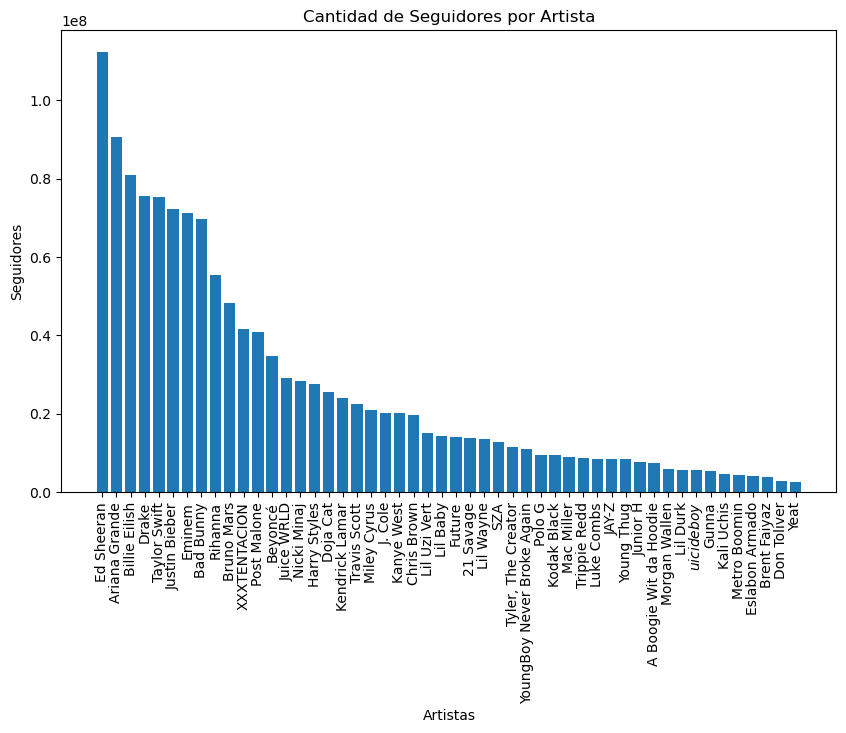

In [18]:
artistas = artistas_followers['name']
seguidores = artistas_followers['followers_total']

plt.figure(figsize=(10, 6))

plt.bar(artistas, seguidores)

plt.xlabel('Artistas')
plt.ylabel('Seguidores')
plt.title('Cantidad de Seguidores por Artista')

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.show()

In [19]:
print("Top 10 canciones 2021")
track10 = df.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False).iloc[:10]
display(track10[['artists', 'name', 'popularity']])


Top 10 canciones 2021


,artists,name,popularity
93802,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",Peaches (feat. Daniel Caesar & Giveon),100
93803,['Olivia Rodrigo'],drivers license,99
93804,['Masked Wolf'],Astronaut In The Ocean,98
92810,['The Weeknd'],Save Your Tears,97
92811,['Kali Uchis'],telepatÃ­a,97
92813,['The Weeknd'],Blinding Lights,96
93805,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",Leave The Door Open,96
92814,['TiÃ«sto'],The Business,95
91866,['Doja Cat'],Streets,94
92816,['Giveon'],Heartbreak Anniversary,94


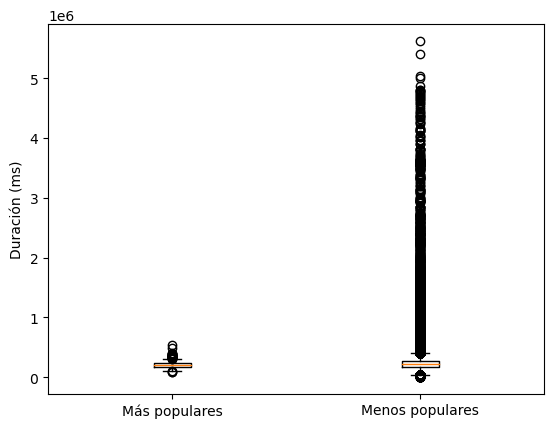

In [20]:
popular_songs = df[df['popularity'] >= 80]
unpopular_songs = df[df['popularity'] < 80]

plt.boxplot([popular_songs['duration_ms'], unpopular_songs['duration_ms']])
plt.xticks([1, 2], ['Más populares', 'Menos populares'])
plt.ylabel('Duración (ms)')
plt.show()

En este gráfico podemos ver que las canciones mas populares tienen una duración bastante menor a las canciones con una popularidad menor al 80, teniendo en cuenta una escala de 0 a 100.

 > #### **Conclusiones**

En línea general podemos ver que la energía de las canciones y la sonoridad o decibeles tienen una muy buena relación, por lo que se puede intuir que mayormente se busca hacer canciones con mucha energía y rudos altos, lo podemos ver también que estos dos atributos tienen un número relevante en la popularidad de las canciones. Pero, por otra parte, podemos ver que mientras más energía tiene la canción menos acústica y menos ruidosas son estas, por lo tanto estos atributos, tanto la acústica y la instrumentación no son tan populares en el ranking, lo que nos llevaria a pensar que mayormente se buscan canciones con sonidos mas artificiales y electronicos.

Podemos ver también una relación bastante buena entre la bailabilidad de las canciones con el nivel de ánimo que transmiten estas.

También se hace notar la corta duracion de las canciones mas populares, lo que nos hace pensar en que mas larga la canción esta se vuelve menos popular.

In [21]:
from IPython.display import HTML



HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

> ## Maching Learning
¿Se puede predecir la popularidad de una nueva canción en Spotify?

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df2 = df

df2 = df2.drop('id', axis=1)
df2 = df2.drop('duration_ms', axis=1)
df2 = df2.drop('name', axis=1)
df2 = df2.drop('artists', axis=1)
df2 = df2.drop('id_artists', axis=1)
df2 = df2.drop('release_date', axis=1)
df2 = df2.drop('year', axis=1)

In [24]:
df2.info()
display(df2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586601 non-null  int64  
 1   explicit          586601 non-null  int64  
 2   danceability      586601 non-null  float64
 3   energy            586601 non-null  float64
 4   key               586601 non-null  int64  
 5   loudness          586601 non-null  float64
 6   mode              586601 non-null  int64  
 7   speechiness       586601 non-null  float64
 8   acousticness      586601 non-null  float64
 9   instrumentalness  586601 non-null  float64
 10  liveness          586601 non-null  float64
 11  valence           586601 non-null  float64
 12  tempo             586601 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 78.8 MB


,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851
1,0,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009
2,0,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418
3,0,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980
4,0,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,72,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,70,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,58,0,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029


In [25]:
print("Variables que se relacionan con la popularidad")
corr = df2.corr()
corr['popularity'][np.absolute(corr['popularity'])>0.1].sort_values(ascending = False)

Variables que se relacionan con la popularidad


popularity          1.000000
loudness            0.327001
energy              0.302178
explicit            0.211749
danceability        0.186878
instrumentalness   -0.236403
acousticness       -0.370723
Name: popularity, dtype: float64

In [26]:
x = df[['loudness', 'energy', 'explicit', 'danceability']] 
y = df[['popularity']] 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Conjunto de entrenamiento:')
print('Número de muestras:', X_train.shape[0])
print('Número de características:', X_train.shape[1])
print('Número de etiquetas:', y_train.shape[0])

print('\nConjunto de prueba:')
print('Número de muestras:', X_test.shape[0])
print('Número de características:', X_test.shape[1])
print('Número de etiquetas:', y_test.shape[0])

Conjunto de entrenamiento:
Número de muestras: 469280
Número de características: 4
Número de etiquetas: 469280

Conjunto de prueba:
Número de muestras: 117321
Número de características: 4
Número de etiquetas: 117321


In [27]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 285.0130547734065
Coeficiente de determinación (R^2): 0.14559462305319548


El Coeficiente de determinación indica que aproximadamente el 14.56% de la variabilidad de la popularidad se explica por las variables independientes utilizadas. Un valor de R^2 más cercano a 1 sería deseable para poder responder a la pregunta inicial.